This notebook demonstrates the usefulness of a set of graphs metadata utilities for analytic workflow

Typical use:

I/O: Read and write to various formats with metadata

Add metadata from analytics: centrality,partitions,etc

Examine metadata

In [13]:
import networkx as nx
from add_weights_rf import add_weights_rf
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline

There is presently metadata stored in the graph from Dave Claypools' scenario generation

Example Initial Metadata:
Positions x,y,z and latitude, longitude
Weights from fading link models stored in linkSuccessRate as floats
add_weights_rf is used above to both filtered directed graph of min(bidirectional_weight_threshold)

In [14]:
G=nx.read_graphml("scenarios/JavaScenario/output_fadingModelRedo/JavaScenarioprocessed00300.graphml")
#Get x,y locations
G=add_weights_rf(G, link_weight='linkSuccessRate', threshold=0.5)
pos_keys=nx.get_node_attributes(G,'location_x').keys()
x=nx.get_node_attributes(G,'location_x').values()
y=nx.get_node_attributes(G,'location_y').values()
pos = {}
for i in range(len(pos_keys)):
    pos[pos_keys[i]] = (x[i],y[i])
print [d for n,d in G.nodes_iter(data=True) if n=="A12"]

[{'location_z': 100.0, 'location_latitude': -4.1598538, 'location_x': 9698.0188067, 'location_y': 9291.1537197, 'location_longitude': 102.7792256}]


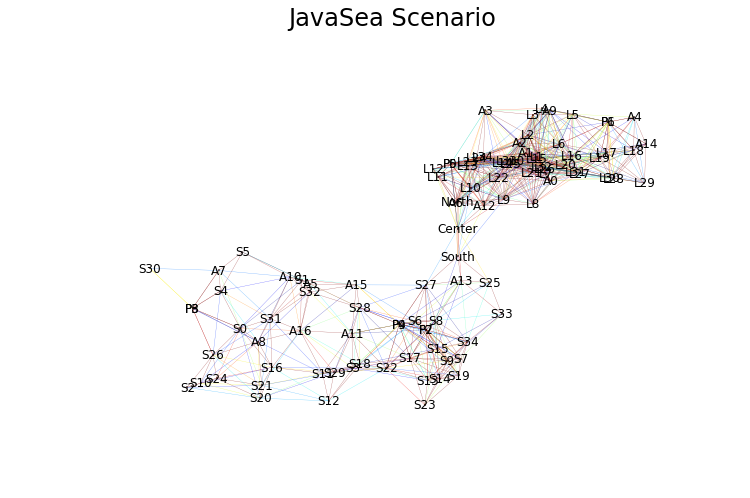

In [15]:
colors= [d["weight"] for x,y,d in G.edges_iter(data=True)]
#pos = nx.spring_layout(G)
fig = plt.figure(figsize=(12,8), dpi=200)
plt.title("JavaSea Scenario",size=24)
plt.axis('off')
nx.draw_networkx(G,pos,node_size=1,width=0.3,alpha=0.6,edge_color=colors)

Try some global metrics first

In [16]:
print "Fiedler or algebraic connectivity is " + str(nx.algebraic_connectivity(G))
#Approximation of nodes needed to be removed to cut graph,etc
print "Node connectivity is " + str(nx.node_connectivity(G))
#Approximation of nodes needed to be removed to cut path between S and T,etc
print "Node connectivity for S16 and S2 is " + str(nx.node_connectivity(G,"S16","S2"))
#
print "Average clustering is " + str(nx.average_clustering(G))
if nx.is_connected(G):
    print "Graph is connected"
print "Graph center is " + str(nx.center(G))
print "Graph diameter is " + str(nx.diameter(G))
print "Graph radius is " + str(nx.radius(G))
print "Nodes on periphery " + str(nx.periphery(G))
print "Average Node Degree is " + str(nx.average_node_connectivity(G))
print "Average SPF Length is " + str(nx.average_shortest_path_length(G))
print "Degree Assortativity is " + str(nx.degree_assortativity_coefficient(G))

Fiedler or algebraic connectivity is 0.113147497126
Node connectivity is 2
Node connectivity for S16 and S2 is 5
Average clustering is 0.727602714753
Graph is connected
Graph center is ['S27', 'S8', 'Center', 'A13', 'S25', 'South']
Graph diameter is 9
Graph radius is 5
Nodes on periphery ['P3', 'P8', 'S26', 'S2', 'S10', 'S30', 'A4', 'S24']
Average Node Degree is 7.45232323232
Average SPF Length is 3.4804040404
Degree Assortativity is 0.629231949921


In [17]:
#TBD: Add a function to build a pandas dataframe with temporal graphs to store global invariants


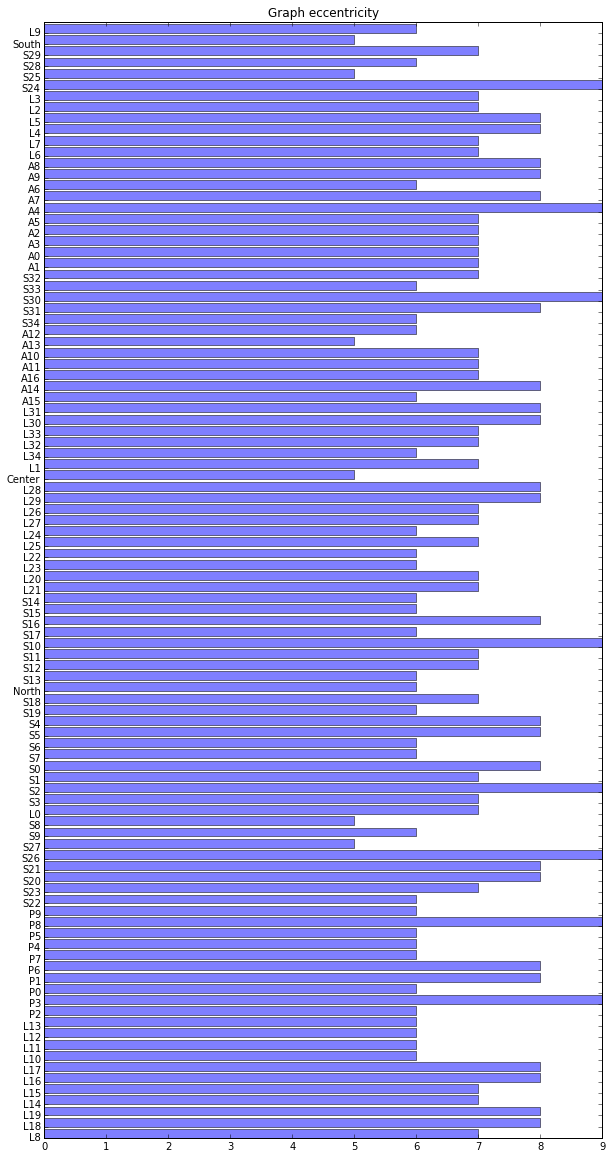

In [18]:
D = nx.eccentricity(G)
# Plot a dictionary
fig = plt.figure(figsize=(10,20), dpi=200)
plt.barh(range(len(D)), D.values(),alpha=0.5)
plt.yticks(range(len(D)), D.keys())
plt.title("Graph eccentricity")
plt.show()

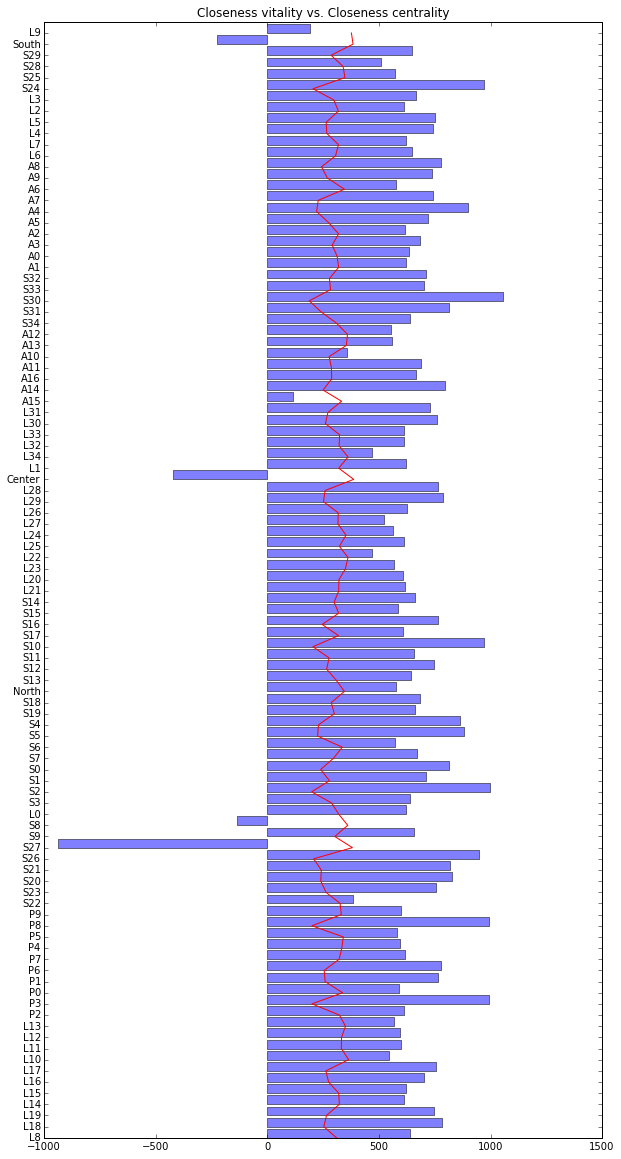

In [19]:
D = nx.closeness_vitality(G)
DC = nx.closeness_centrality(G)
# Plot a dictionary
fig = plt.figure(figsize=(10,20), dpi=200)
plt.barh(range(len(D)), D.values(),alpha=0.5)
xvals=[x * 1000.0 for x in DC.values()]
plt.plot(xvals,range(len(DC)),color="r")
plt.yticks(range(len(D)), D.keys())
plt.title("Closeness vitality vs. Closeness centrality")
plt.show()
plt.show()

In [20]:
import macker_graph_utils as gu
G=gu.metadata_to_graph(G)
print [d for n,d in G.nodes_iter(data=True) if n=="A12"]

[{'curr_cent': 0.08362007309906895, 'degree_cent': 0.24242424242424243, 'degree': 24, 'eigen_cent': 0.11577608763876113, 'location_z': 100.0, 'location_latitude': -4.1598538, 'location_x': 9698.0188067, 'location_y': 9291.1537197, 'location_longitude': 102.7792256, 'betweenness': 0.03624345512650458}]


In [21]:
eigen_cent=nx.get_node_attributes(G,'eigen_cent')
#print eigen_cent.keys(),eigen_cent.values()
curr_cent=nx.get_node_attributes(G,'curr_cent')
betweenness=nx.get_node_attributes(G,'betweenness')
degree_cent=nx.get_node_attributes(G,'degree_cent')
edge_weights=(nx.get_edge_attributes(G,'linkSuccessRate'))
edge_colors=edge_weights.values()

In [25]:
print nx.attribute_assortativity_coefficient(G,"eigen_cent")
print nx.attribute_assortativity_coefficient(G,"curr_cent")
print nx.attribute_assortativity_coefficient(G,"betweenness")
print nx.attribute_assortativity_coefficient(G,"degree")

-0.0122963473205
-0.0122963473205
-0.00823095555753
0.0167977027199


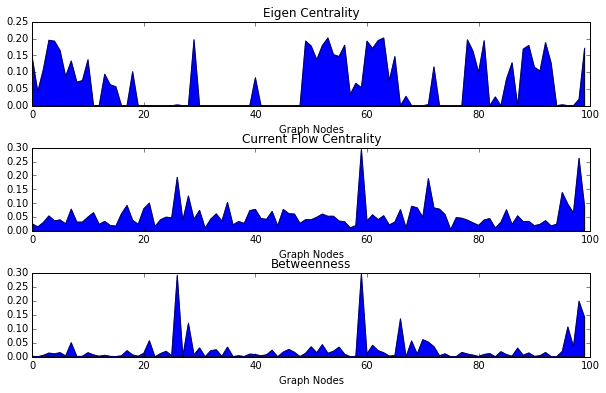

In [10]:
#Lets do some metadata graphing examples

import matplotlib.pyplot as plt
alpha = 0.4
    
fig = plt.figure(figsize=(10,6), dpi=200)
ax_eigen_cent = fig.add_subplot(311)
ax_curr_cent  = fig.add_subplot(312)
ax_between = fig.add_subplot(313)
plt.subplots_adjust(hspace=0.5)
x = range(len(G.nodes()))   
ax_eigen_cent.plot(eigen_cent.values(),alpha=0.5)
ax_eigen_cent.fill_between(x,0, eigen_cent.values())
ax_eigen_cent.set_title('Eigen Centrality')
ax_eigen_cent.set_xlabel('Graph Nodes')
#Too Many text labels to be readable uncomment if desired
#ax_eigen_cent.xaxis.set_ticks(range(len(eigen_cent.keys())),eigen_cent.keys)
#ax_eigen_cent.xaxis.set_ticklabels(eigen_cent.keys(),minor=True,size=8)

ax_curr_cent.plot(curr_cent.values(),alpha=0.5)
ax_curr_cent.fill_between(x,0, curr_cent.values())
ax_curr_cent.set_title("Current Flow Centrality")
ax_curr_cent.set_xlabel('Graph Nodes')
#ax_curr_cent.xaxis.set_ticks(range(len(eigen_cent.keys())),eigen_cent.keys)
#ax_curr_cent.xaxis.set_ticklabels(eigen_cent.keys(),minor=True,size=8)

ax_between.plot(betweenness.values(),alpha=0.5)
ax_between.fill_between(x,0, betweenness.values())
ax_between.set_title("Betweenness")
ax_between.set_xlabel('Graph Nodes')
#ax_between.xaxis.set_ticks(range(len(eigen_cent.keys())),eigen_cent.keys)
#ax_between.xaxis.set_ticklabels(eigen_cent.keys(),minor=True,size=8)


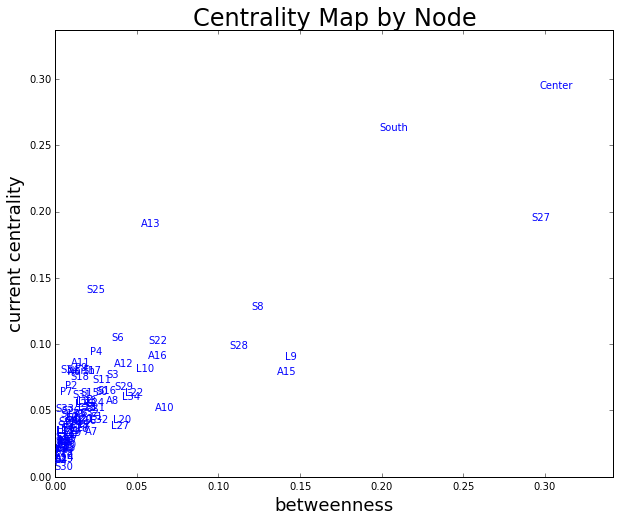

In [11]:
dict1=betweenness
dict2=curr_cent

# Create items and extract centralities
items1 = sorted(dict1.items())
items2 = sorted(dict2.items())
xdata=[b for a,b in items1]
ydata=[b for a,b in items2]

fig = plt.figure(figsize=(10,8))
plt.ax_cent_2D = fig.add_subplot(111)
# Add each actor to the plot by ID
for p in xrange(len(items1)):
    plt.ax_cent_2D.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")


# Set new x- and y-axis limits
plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
# Add labels and save
plt.ax_cent_2D.set_xlabel("betweenness",size=18)
plt.ax_cent_2D.set_ylabel("current centrality",size=18)
plt.title("Centrality Map by Node",size=24) 

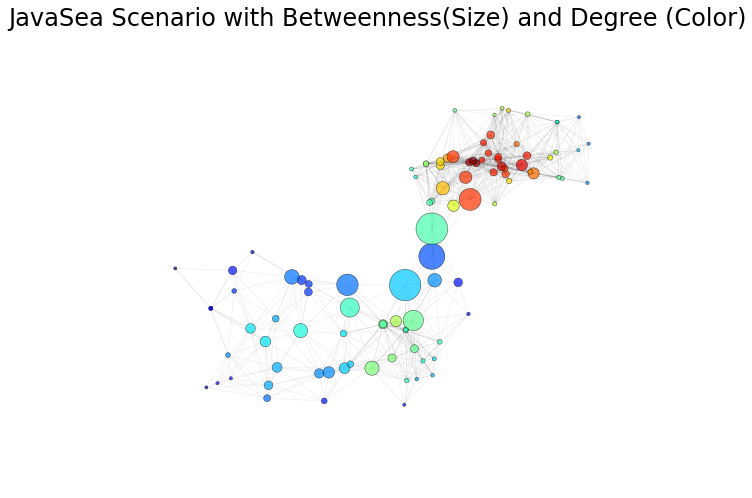

In [12]:
from scipy.interpolate import interp1d
#the scipy interpolator mapps ranges of numbers
m = interp1d([0,1],[10,1000])
bet_map = interp1d([min(betweenness.values()),max(betweenness.values())],[0,1]) 
deg_map = interp1d([min(degree_cent.values()),max(degree_cent.values())],[0,1])
colors= deg_map([d["degree_cent"] for n,d in G.nodes_iter(data=True)])
size = bet_map([d["betweenness"] for n,d in G.nodes_iter(data=True)])
sizes =  m(size)

fig = plt.figure(figsize=(10,8))
plt.axis('off')
plt.title("JavaSea Scenario with Betweenness(Size) and Degree (Color)",size=24)
nx.draw_networkx_nodes(G,pos,node_size=sizes,node_color=colors,linewidths=0.5,width=0.5,alpha=0.7,with_labels=False)
nx.draw_networkx_edges(G,pos,alpha=0.05)

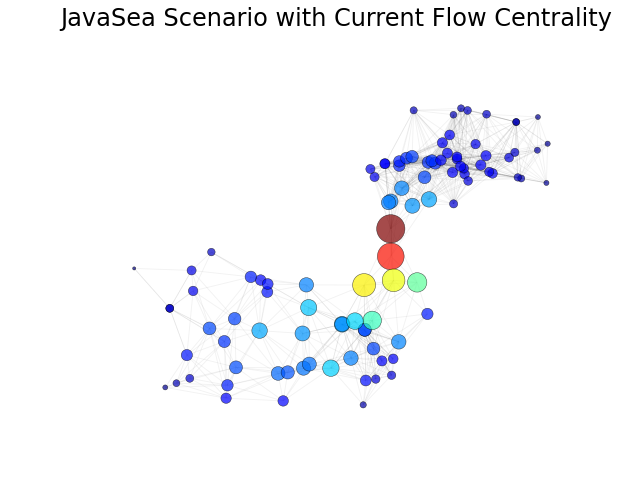

In [13]:
from scipy.interpolate import interp1d
#the scipy interpolator mapps ranges of numbers
m = interp1d([0,1],[10,800])
d = interp1d([min(curr_cent.values()),max(curr_cent.values())],[0,1])   
colors =  d([d["curr_cent"] for n,d in G.nodes_iter(data=True)])
sizes =  m(colors)


fig = plt.figure(figsize=(10,8))
plt.axis('off')
plt.title("JavaSea Scenario with Current Flow Centrality",size=24)
nx.draw_networkx_nodes(G,pos,node_size=sizes,node_color=colors,linewidths=0.5,width=0.5,alpha=0.7,with_labels=False)
nx.draw_networkx_edges(G,pos,alpha=0.05)

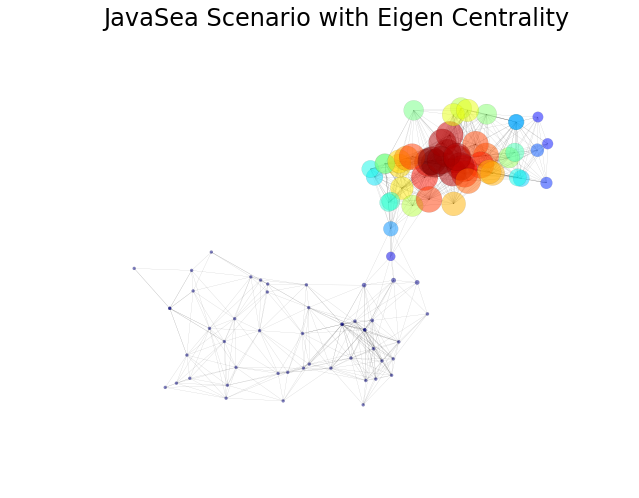

In [14]:
m = interp1d([0,1],[10,800])
d = interp1d([min(eigen_cent.values()),max(eigen_cent.values())],[0,1])
colors =  d([d["eigen_cent"] for n,d in G.nodes_iter(data=True)])
sizes =  m(colors)

fig = plt.figure(figsize=(10,8))
plt.axis('off')
plt.title("JavaSea Scenario with Eigen Centrality",size=24)
nx.draw(G,pos,node_size=sizes,node_color=colors,linewidths=0.1,width=0.1,alpha=0.5,with_labels=False)

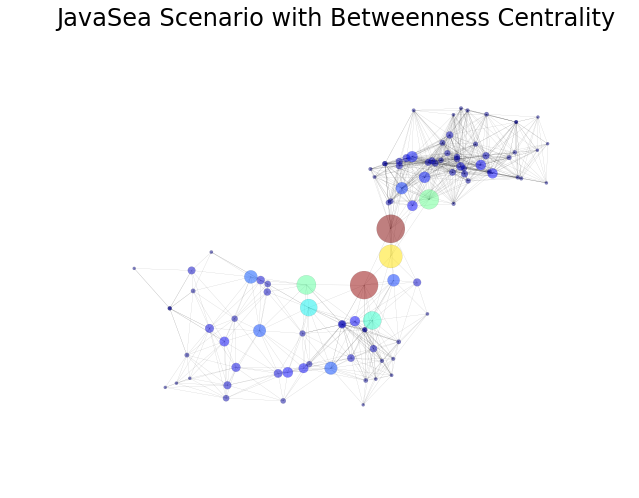

In [15]:
m = interp1d([0,1],[10,800])
d = interp1d([min(betweenness.values()),max(betweenness.values())],[0,1])
colors =  d([d["betweenness"] for n,d in G.nodes_iter(data=True)])
sizes =  m(colors)
fig = plt.figure(figsize=(10,8))
plt.axis('off')
plt.title("JavaSea Scenario with Betweenness Centrality",size=24)
nx.draw(G,pos,node_size=sizes,node_color=colors,linewidths=0.1,width=0.1,alpha=0.5,with_labels=False)

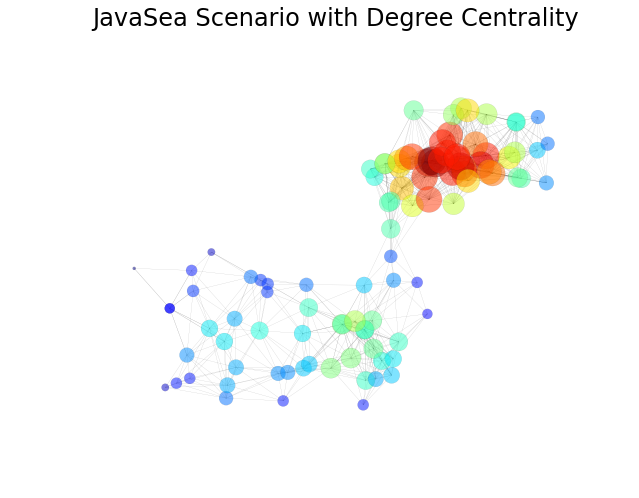

In [16]:
m = interp1d([0,1],[10,800])
d = interp1d([min(degree_cent.values()),max(degree_cent.values())],[0,1])

colors =  d([d["degree_cent"] for n,d in G.nodes_iter(data=True)])
sizes =  m(colors)
fig = plt.figure(figsize=(10,8))
plt.axis('off')
plt.title("JavaSea Scenario with Degree Centrality",size=24)
nx.draw(G,pos,node_size=sizes,node_color=colors,linewidths=0.1,width=0.1,alpha=0.5,with_labels=False)

Filter out a number nodes by an attribute threshold

In [17]:
H=gu.trim_nodes_by_attribute_value(G,curr_cent,0.1)

{'A13': <matplotlib.text.Text at 0x10af82c10>,
 'Center': <matplotlib.text.Text at 0x10af82290>,
 'S22': <matplotlib.text.Text at 0x10af916d0>,
 'S25': <matplotlib.text.Text at 0x10af91410>,
 'S27': <matplotlib.text.Text at 0x10af91210>,
 'S6': <matplotlib.text.Text at 0x10af91f90>,
 'S8': <matplotlib.text.Text at 0x10af76110>,
 'South': <matplotlib.text.Text at 0x10af9dcd0>}

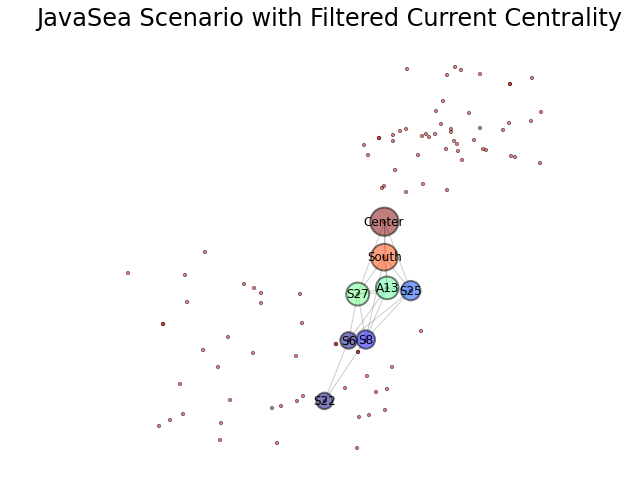

In [18]:
m = interp1d([0,1],[10,800])
d = interp1d([min(curr_cent.values()),max(curr_cent.values())],[0,1])

colors =  d([d["curr_cent"] for n,d in H.nodes_iter(data=True)])
sizes =  m(colors)
fig = plt.figure(figsize=(10,8))
plt.axis('off')
plt.title("JavaSea Scenario with Filtered Current Centrality",size=24)
nx.draw_networkx_nodes(G,pos,node_size=10,alpha=0.5,with_labels=True)
nx.draw_networkx_nodes(H,pos,node_size=sizes,node_color=colors,linewidths=2.0,width=0.1,alpha=0.5,with_labels=True)
nx.draw_networkx_edges(H,pos,alpha=0.2)
nx.draw_networkx_labels(H,pos)

What if I do not know the range of values or how to set threshold?
This is a typical situation with centrality type metrics
Better to sort/filter by highest/lowest values

In [19]:
num_to_show=2
curr_sorted = sorted(curr_cent.items(), key=itemgetter(1), reverse=False)
H=gu.trim_nodes_by_attribute_for_remaining_number(G,curr_sorted,num_to_show)

Now graph has node count:  2


{'Center': <matplotlib.text.Text at 0x10ba5abd0>,
 'South': <matplotlib.text.Text at 0x109eace50>}

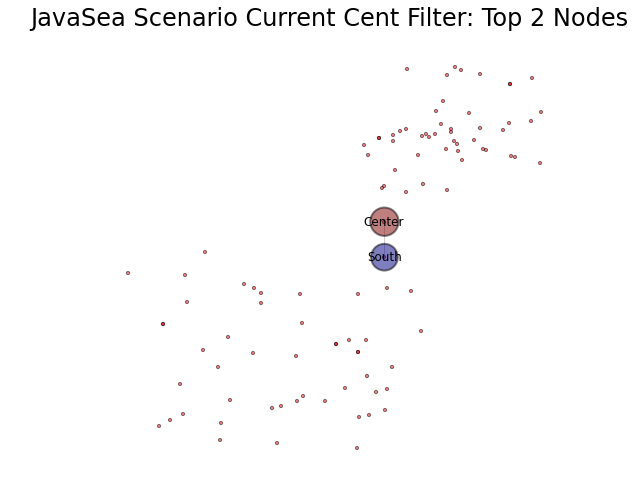

In [20]:
m = interp1d([0,1],[10,800])
d = interp1d([min(curr_cent.values()),max(curr_cent.values())],[0,1])

colors =  d([d["curr_cent"] for n,d in H.nodes_iter(data=True)])
sizes =  m(colors)
fig = plt.figure(figsize=(10,8))
plt.axis('off')
title="JavaSea Scenario Current Cent Filter:"
title=title+" Top " + str(num_to_show) + " Nodes"
plt.title(title,size=24)
nx.draw_networkx_nodes(G,pos,node_size=10,alpha=0.5,with_labels=True)
nx.draw_networkx_nodes(H,pos,node_size=sizes,node_color=colors,linewidths=2.0,width=0.1,alpha=0.5,with_labels=True)
nx.draw_networkx_edges(H,pos,alpha=0.2)
nx.draw_networkx_labels(H,pos)

Do some edge centrality and filtering stuff, this could be more applicable to wireless type models

In [21]:
G= gu.calculate_edge_current_flow_centrality(G,weight="LinkSuccessRate")

In [22]:
num_top_edges=8
edge_curr_cent=(nx.get_edge_attributes(G,'curr_cent'))
edge_curr_sorted = sorted(edge_curr_cent.items(), key=itemgetter(1), reverse=True)
top_edges=edge_curr_sorted[0:num_top_edges]
evals=[]
# Just map colors of selected edges to full range for visibility
for edge,value in top_edges:
    evals.append(value)
d = interp1d([min(evals),max(evals)],[0,1])
colors =  d(evals)

{'S8': 'S8', 'Center': 'Center', 'A13': 'A13', 'L10': 'L10', 'S27': 'S27', 'S25': 'S25', 'South': 'South', 'L9': 'L9'}


{'A13': <matplotlib.text.Text at 0x1091dea90>,
 'Center': <matplotlib.text.Text at 0x1091de850>,
 'L10': <matplotlib.text.Text at 0x1091decd0>,
 'L9': <matplotlib.text.Text at 0x10de76dd0>,
 'S25': <matplotlib.text.Text at 0x10de76550>,
 'S27': <matplotlib.text.Text at 0x10de76110>,
 'S8': <matplotlib.text.Text at 0x1091de710>,
 'South': <matplotlib.text.Text at 0x10de76990>}

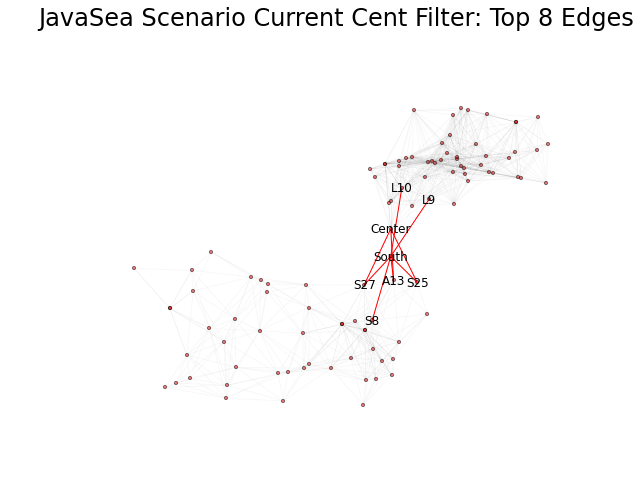

In [23]:
fig = plt.figure(figsize=(10,8))
plt.axis('off')
title="JavaSea Scenario Current Cent Filter:"
title=title+" Top " + str(num_top_edges) + " Edges"
plt.title(title,size=24)
edge_list=[]
node_list={}
for i in range(num_top_edges+1):
    edge_list.append(edge_curr_sorted[i][0])
    node_list[edge_curr_sorted[i][0][0]]=edge_curr_sorted[i][0][0]
    node_list[edge_curr_sorted[i][0][1]]=edge_curr_sorted[i][0][1]
print node_list
H=nx.from_edgelist(edge_list)
nx.draw_networkx_nodes(G,pos,node_size=10,alpha=0.5,with_labels=True)
nx.draw_networkx_edges(G,pos,alpha=0.03)
nx.draw_networkx_edges(G,pos,edgelist=edge_list,edge_color="r")
nx.draw_networkx_labels(G,pos,labels=node_list)